# Comparative analysis  
###### *(between my data and teacher's data)*

## Comparing Raw Data

In [22]:
# Reading Teacher's data
mean_mt_data_prof <- read.csv("20211117_1527_MeanMT.csv", header=T)
raw_data_prof <- read.csv("20211117_1527_RawData.csv", header=T)

In [23]:
# Reading my data
mean_mt_data_mine <- read.csv("17-10-2024_MeanMTData.csv", header = TRUE)
raw_data_mine <- read.csv("17-10-2024_RawData.csv", header = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    855    1068    1284    1454    1744    2655 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     899    1057    1106    1250    2655 

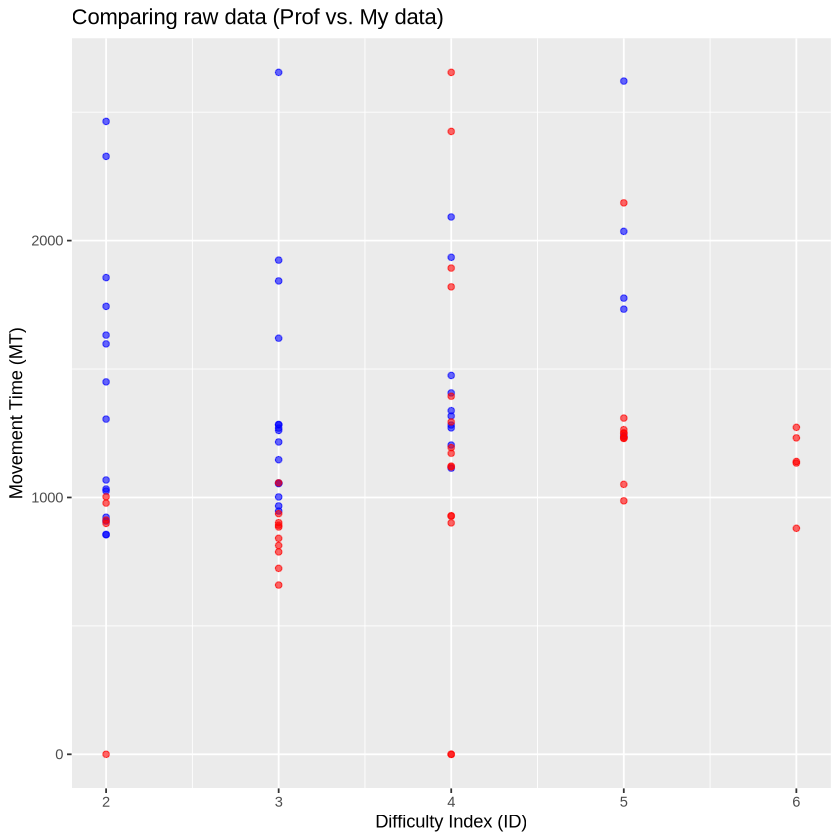

In [24]:
# Comparison of descriptive statistics
summary(raw_data_prof$MT)
summary(raw_data_mine$MT)

# Raw Data Visualization
library(ggplot2)
ggplot() +
  geom_point(data = raw_data_prof, aes(x = ID, y = MT), color = "blue", alpha = 0.6) +
  geom_point(data = raw_data_mine, aes(x = ID, y = MT), color = "red", alpha = 0.6) +
  labs(title = "Comparing raw data (Prof vs. My data)", 
       x = "Difficulty Index (ID)", y = "Movement Time (MT)")


#### Interpretation (Comparison):

###### a. Movement Time (MT) Distribution:
- It can be observed that both datasets have quite close movement time (MT) values for each difficulty index (ID) level.
- The MT values of both datasets increase similarly as the difficulty index (DI) increases. This confirms the general trend of Fitts' Law: more difficult tasks take longer.

###### b. Data Variability:
- For some difficulty indices (e.g., ID = 3 and ID = 4), the MT values in the teacher's data appear more spread out than in mine, which may indicate greater variability in performance in her experiment.
- My distribution (red) appears a bit more homogeneous, which may indicate that the participants or test conditions were more consistent.

###### c. Outliers and Differences:

For some difficulty index levels, such as ID = 2 and ID = 5, there appear to be higher MT values in the teacher's data, which could indicate more frequent errors or difficulties in these trials.

###### d. Comparison of Summary Statistics:

MT values are slightly higher in the teacher's data for the first and third quartiles, meaning that the teacher's group took slightly longer on average to reach the targets.

#### Conclusion :

Both sets follow the same trend, validating Fitts' hypothesis. The differences in variability and MT values may be due to experimental factors (e.g., user skill, accuracy in testing) or differences in experimental conditions.

## Comparing Mean Data (MeanMT)

Let's use a plot and linear regression for each dataset:

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


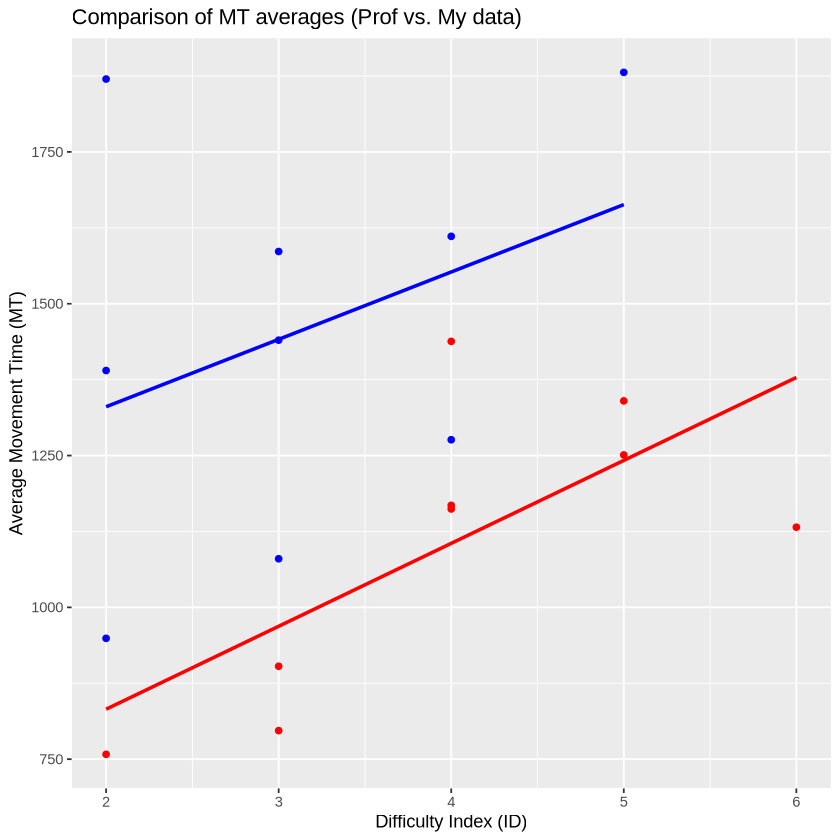

In [25]:
ggplot() +
  geom_point(data = mean_mt_data_prof, aes(x = ID, y = MT), color = "blue") +
  geom_smooth(data = mean_mt_data_prof, aes(x = ID, y = MT), method = "lm", color = "blue", se = FALSE) +
  geom_point(data = mean_mt_data_mine, aes(x = ID, y = MT), color = "red") +
  geom_smooth(data = mean_mt_data_mine, aes(x = ID, y = MT), method = "lm", color = "red", se = FALSE) +
  labs(title = "Comparison of MT averages (Prof vs. My data)", 
       x = "Difficulty Index (ID)", y = "Average Movement Time (MT)")


#### Interpretation (Comparison):

###### a. Regression Slopes :
- The trend lines (blue for the teacher's data and red for mine) show a positive slope for each data set, which confirms that movement time increases with difficulty, in accordance with Fitts' law.
- The slope of the regression for my data (red) is lower than that of the teacher's data (blue), meaning that in my experiment, the increase in movement time with difficulty is less marked.

###### b. Mean MT Differences:
- The mean MT values in my data are generally lower than the teacher's for most ID levels. This may be due to differences in experimental conditions or participant skills.
- The gap between the two trend lines is noticeable, which could indicate a systematic difference in how the two experiments were conducted (e.g., different equipment, training conditions, or accuracy).


#### Conclusion :
Differences between regression models (in terms of slope and intercept) could indicate variations in experimental implementation or conditions. This warrants further analysis to understand whether these differences arise from human factors or experimental settings.

## Comparing Linear Regression Models

Let us calculate the linear models for both MeanMT datasets and compare the coefficients a, b and the R²:

In [26]:
# Teacher's model
model_prof <- lm(MT ~ ID, data = mean_mt_data_prof)
summary(model_prof)

# My model
model_mine <- lm(MT ~ ID, data = mean_mt_data_mine)
summary(model_mine)


Call:
lm(formula = MT ~ ID, data = mean_mt_data_prof)

Residuals:
   Min     1Q Median     3Q    Max 
-381.4 -276.3   58.7  144.7  539.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   1108.4      351.1   3.158    0.016 *
ID             111.0      107.5   1.032    0.336  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 320.5 on 7 degrees of freedom
Multiple R-squared:  0.1321,	Adjusted R-squared:  0.008146 
F-statistic: 1.066 on 1 and 7 DF,  p-value: 0.3363



Call:
lm(formula = MT ~ ID, data = mean_mt_data_mine)

Residuals:
    Min      1Q  Median      3Q     Max 
-246.61  -74.28    8.97   62.56  332.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   559.11     216.71   2.580   0.0365 *
ID            136.58      52.05   2.624   0.0342 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.3 on 7 degrees of freedom
Multiple R-squared:  0.4959,	Adjusted R-squared:  0.4238 
F-statistic: 6.885 on 1 and 7 DF,  p-value: 0.03421


Trying to organize the results to read them better:

In [27]:
install.packages("broom")
install.packages("dplyr")
install.packages("tidyr")

library(broom)
library(dplyr)
library(tidyr)

# Extracting coefficients and statistics from each model
results_prof <- tidy(model_prof) %>%
  select(term, estimate) %>%
  pivot_wider(names_from = term, values_from = estimate) %>%
  mutate(R2 = summary(model_prof)$r.squared, Model = "Prof")

results_mine <- tidy(model_mine) %>%
  select(term, estimate) %>%
  pivot_wider(names_from = term, values_from = estimate) %>%
  mutate(R2 = summary(model_mine)$r.squared, Model = "Mine")

# Creating a combo table
results_table <- bind_rows(results_prof, results_mine) %>%
  rename(Intercept_a = `(Intercept)`, Slope_b = ID)

# Showing table
print(results_table)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# A tibble: 2 × 4
  Intercept_a Slope_b    R2 Model
        <dbl>   <dbl> <dbl> <chr>
1       1108.    111. 0.132 Prof 
2        559.    137. 0.496 Mine 


#### Comparison :

###### *Teacher's Model:*
- R² = 0.132: meaning that only 13.2% of the variance in movement time is explained by the difficulty index in the teacher's model.
- P-value for the slope coefficient (b) = 0.336: indicating that the difficulty index (ID) does not have a statistically significant effect on movement time (MT) in this model.

###### *My Model:*
- R² = 0.496: or 49.6% of the variance explained, which is significantly higher than in the teacher's model.
- P-value for the slope coefficient (b) = 0.0342: which shows that the effect of the difficulty index (ID) on the movement time is statistically significant in my model (at the 5% level).

#### Interpretation :

- Model Accuracy: My model has better explanatory power (49.6% of variance explained) compared to the teacher's model (13.2%). This may indicate that my data better follows Fitts's distribution, or that my experiment had more consistent performance with task difficulty.
- Intercept and Slope Differences: The lower intercept in my model could indicate that the baseline movement time (for ID close to zero) is faster in my experiment. Also, the higher slope in my model shows a more pronounced increase in movement time with difficulty.
- Statistical Significance: In my model, the slope (b) is significant (p < 0.05), suggesting that ID has a more robust effect on MT in my data.

#### Conclusion :
The difference between the two models suggests a better fit of my data to the linear relationship between ID and MT. This may be due to experimental conditions, differences in participant skills, or variations in measurement precision, and thus these results highlight the importance of testing the robustness of Fitts' Law parameters across different experimental settings.

## Conclusion 

The comparison of the data highlights several significant differences. These differences provide insights into the parameters that influence the results and validity of linear regression models, which can be: the accuracy and consistency of collected data, participants’ skills and abilities, experimental conditions, potential biases and sources of error.

To go further and optimize the experiment, it would be wise to systematically analyze and control these influential parameters in future experiments, seeking to standardize the conditions and taking into account the characteristics of the participants. Such an approach would allow to further validate the results and strengthen the robustness of the linear model applied to MT as a function of ID.

# Improving experience design and analysis

We will try to present some possible avenues for improving the experiment based on the comparative results we obtained in our initial analysis and on principles related to Fitts' law.

## Improving data collection

##### a. Increasing the number of participants / Switching devices

My first idea to improve the experiment was to increase the number of participants. This would allow to capture a more representative distribution of movement times (MT) and to observe the variability between users. Indeed, with several participants each focusing on a target, the task would become more accessible and the movement time could decrease, compared to a case where a single user has to switch from one target to another (left and right) on each trial. However, working alone on this experiment, I do not have the possibility to add other participants.

To compensate, I considered an alternative: switching devices. Rather than using a PC with a mouse as in the first attempt, I will use a touchscreen phone. This introduces a new interaction dynamic, because by using both hands, each will be able to focus on a target (left or right). This approach allows to add a different level of interaction compared to the mouse, which could affect the MT due to the direct input method. To maintain accuracy, I will make sure to stabilize the phone (by placing it on a surface) to minimize phone movement during the experiment.


##### b. Varying the values of 𝐴(amplitude) and 𝑊(width) more systematically

Currently, the values of amplitude (A) and width (W) are limited, which reduces the range of difficulty indices (ID) tested. By increasing the number of levels for 𝐴 and 𝑊, we will be able to better explore different ID values and thus improve the robustness and reliability of the model. This will allow to verify whether the relationship between MT and ID holds over a wider range of values.

- A = 128,256,512

- W = 16,32,64

##### c. Controlling pointing errors

For a more complete analysis of performance, we will integrate a control for pointing errors. By noting not only the MT but also the error rate (i.e. the cases where the scoring fails), we will be able to gain a deeper insight into how we perform across varying difficulty levels. This will enrich the analysis by taking into account both the speed and accuracy of users.

*Data collected*

I ran the experiment again, but this time with 16, 32 and 64 widths and with 128, 256 and 512 distances, with 6 trials for each combination.
- I performed 36 pointing errors
- Fitts modeling in the form of MT = 83.329 + 8.393log(A/W + 1) with R² = 0.322
- The table of mean MT that I provide in the data folder (2nd attempt).
- The table of raw pointing data that I provide in data folder (2nd attempt).

### Calculation and visualization of error rates by ID

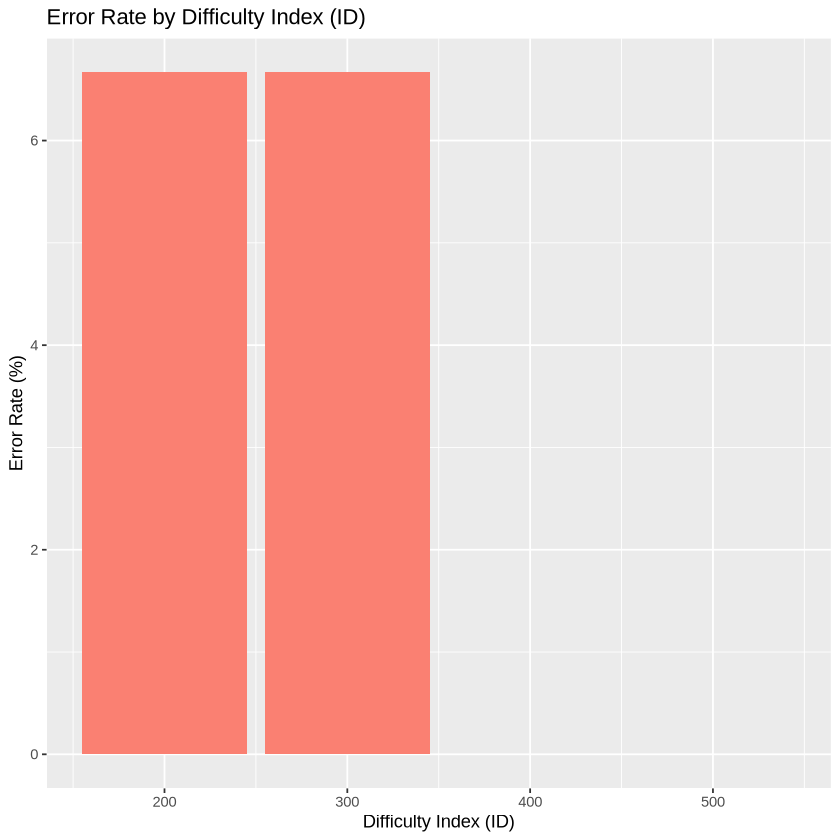

In [28]:
# Loading data
mean_mt_data_2 <- read.csv("04-11-2024_MeanMTData.csv", header = TRUE)
raw_data_2 <- read.csv("04-11-2024_RawData.csv", header = TRUE)

# Adding error column (error if MT = 0)
raw_data_2$error <- ifelse(raw_data_2$MT == 0, 1, 0)

# Calculation of error rate by ID
error_rate_by_id <- aggregate(error ~ ID, data = raw_data_2, mean) * 100
colnames(error_rate_by_id)[2] <- "error_rate"

# View error rate by ID
library(ggplot2)
ggplot(error_rate_by_id, aes(x = ID, y = error_rate)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Error Rate by Difficulty Index (ID)", x = "Difficulty Index (ID)", y = "Error Rate (%)")


An error rate of 6% is relatively low, which may indicate that participants were generally accurate in their movements, but it might be interesting to further examine the nature of these errors (e.g., errors due to fatigue or difficulties with the device used).

### Visualization of MT distribution by ID

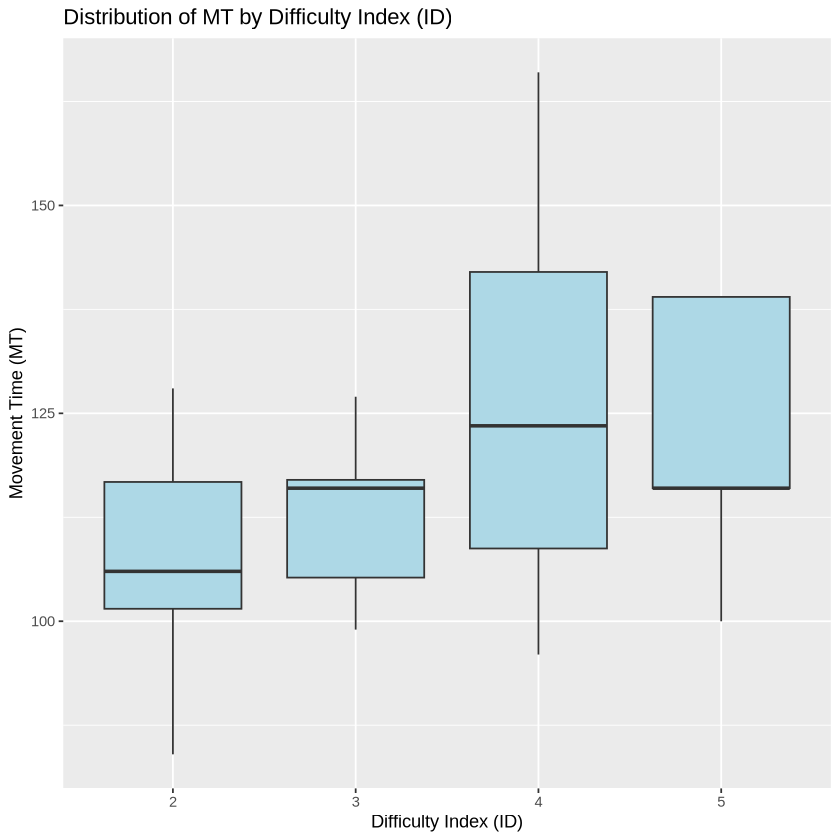

In [29]:
# Filtering data to remove errors (MT = 0)
raw_data_no_errors <- subset(raw_data_2, MT > 0)

# Visualizing MT distribution by ID with a boxplot
ggplot(raw_data_no_errors, aes(x = as.factor(ID), y = MT)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Distribution of MT by Difficulty Index (ID)", x = "Difficulty Index (ID)", y = "Movement Time (MT)")


- We observe that the variability of the MT (the width of the boxes) seems to increase with difficulty (ID), particularly for levels 4 and 5. This suggests that as the task becomes more difficult, movement times become more dispersed. This increased variability for higher ID levels could indicate that participants have less consistent performance on more difficult tasks.


- In general, the medians of the boxes also increase with ID, which is consistent with Fitts' law: movement time tends to increase as task difficulty increases. This result is expected, since higher difficulty levels generally require more precise or more distant movements, resulting in a longer MT.

### Fitting the linear model for MT as a function of ID, with error control

In [30]:
# Calculation of average MTs by ID
mean_data <- aggregate(MT ~ ID, data = raw_data_no_errors, mean)

# Fitting the linear model
model <- lm(MT ~ ID, data = mean_data)
summary(model)


Call:
lm(formula = MT ~ ID, data = mean_data)

Residuals:
     1      2      3      4 
-0.960 -1.599  6.077 -3.519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   98.040      8.442  11.614  0.00733 **
ID             5.496      2.298   2.392  0.13920   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.138 on 2 degrees of freedom
Multiple R-squared:  0.741,	Adjusted R-squared:  0.6115 
F-statistic: 5.721 on 1 and 2 DF,  p-value: 0.1392


#### Interpretation


###### a. Model equation : 

The model formula is: MT = 98.04 + 5.496 × ID. This model predicts MT as a function of ID, with an intercept of 98.04 and a slope of 5.496.


###### b. Meaning of the coefficients:

- Intercept (98.04): When ID is zero, the model predicts a MT of 98.04. While ID is not actually zero in our dataset, the intercept gives an idea of the baseline for movement time.
- ID (5.496): This indicates that for every one-unit increase in ID, movement time increases by an average of 5.496 ms. However, the associated p-value (0.1392) is greater than the usual threshold of 0.05, suggesting that this increase is not statistically significant with this small sample.


###### c. Quality of fit :

- Multiple R² (0.741): About 74.1% of the MT variability is explained by the ID. This indicates a relatively good, but not perfect, fit to the linear model.
- Adjusted R² (0.6115): The adjusted R², which takes into account the number of variables in the model, is slightly lower. This suggests that the model may be influenced by the small number of data points.
- Standard error of residuals (5.138): The variability of the residuals is about 5.138 ms around the model prediction. This means that MT predictions based on this model could deviate by 5 ms on average.
  

###### d. F-value and p-value (0.1392) : 

The F-test (5.721) and its p-value of 0.1392 suggest that, overall, the model is not significantly better than a model without the effect of ID, given the small sample size (only 4 observations).


#### Conclusion

- The association between MT and ID is not statistically significant with the current small sample. It is possible that with more data, the slope could become significant, indicating that MT actually increases with ID.

- If ID influences MT in a non-linear manner, considering a polynomial model could help capture this relationship. Alternatively, a log-log model (log(MT) ~ log(ID)) could be tested to see if a better fit is achieved.

- It would be beneficial to collect more data to obtain more reliable estimates and potentially obtain statistical significance.

### Visualization of the fitted model

Warning message in geom_point(color = "blue", size = 2, label = "Observed MT"):
“Ignoring unknown parameters: `label`”
Warning message in geom_line(aes(y = predicted_MT), color = "red", size = 1, label = "Predicted MT"):
“Ignoring unknown parameters: `label`”


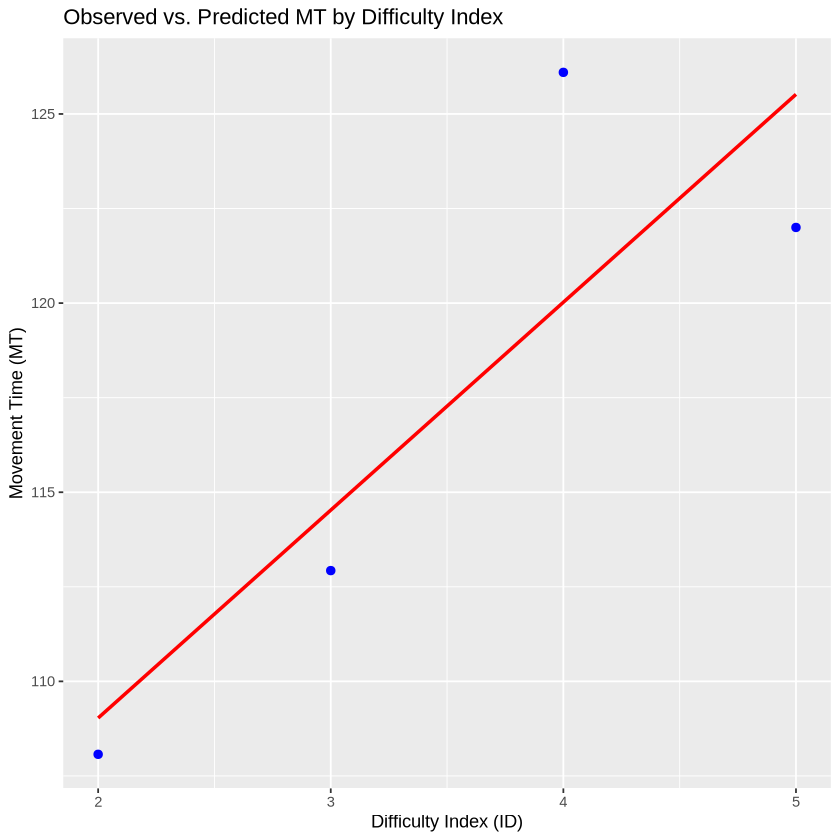

In [31]:
# Predictions of the linear model
mean_data$predicted_MT <- predict(model)

# Visualization
ggplot(mean_data, aes(x = ID, y = MT)) +
  geom_point(color = "blue", size = 2, label = "Observed MT") +
  geom_line(aes(y = predicted_MT), color = "red", size = 1, label = "Predicted MT") +
  labs(title = "Observed vs. Predicted MT by Difficulty Index", x = "Difficulty Index (ID)", y = "Movement Time (MT)")

- The linear trend seems to follow the increase in MT with ID, but there is also some scatter around this trend, especially at indices 4 and 5.

- This scatter could indicate that the linear relationship is an approximation, but it does not perfectly capture the variations in MT with ID. This could be due to a small number of observations or additional factors influencing MT.

- This visualization helps to assess the fit of the linear model, but a more sophisticated model might be needed to capture all the variations in MT with ID.

## Analyzing more parameters

For example, if we had time-series data, it would be possible to calculate the mean MT at the beginning and end of each session in order to analyze the impact of fatigue on participants' performance (i.e., assess how it affects their efficiency). Furthermore, if information on individual characteristics (such as age) were available, they could be incorporated as covariates in the model, allowing their influence on MT to be examined.

## Adjustment of statistical analyses

### Improved regression model (Polynomial  Model)

Rather than using a simple linear model, let's try to consider a polynomial model to see if other relationships between MT and ID might fit better :


Call:
lm(formula = MT ~ poly(ID, 2), data = mean_mt_data_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.937  -4.604   2.063   8.868  12.906 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   110.222      4.703  23.435 3.96e-07 ***
poly(ID, 2)1   28.100     14.110   1.991   0.0935 .  
poly(ID, 2)2   -2.323     14.110  -0.165   0.8746    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 6 degrees of freedom
Multiple R-squared:  0.3996,	Adjusted R-squared:  0.1995 
F-statistic: 1.997 on 2 and 6 DF,  p-value: 0.2164


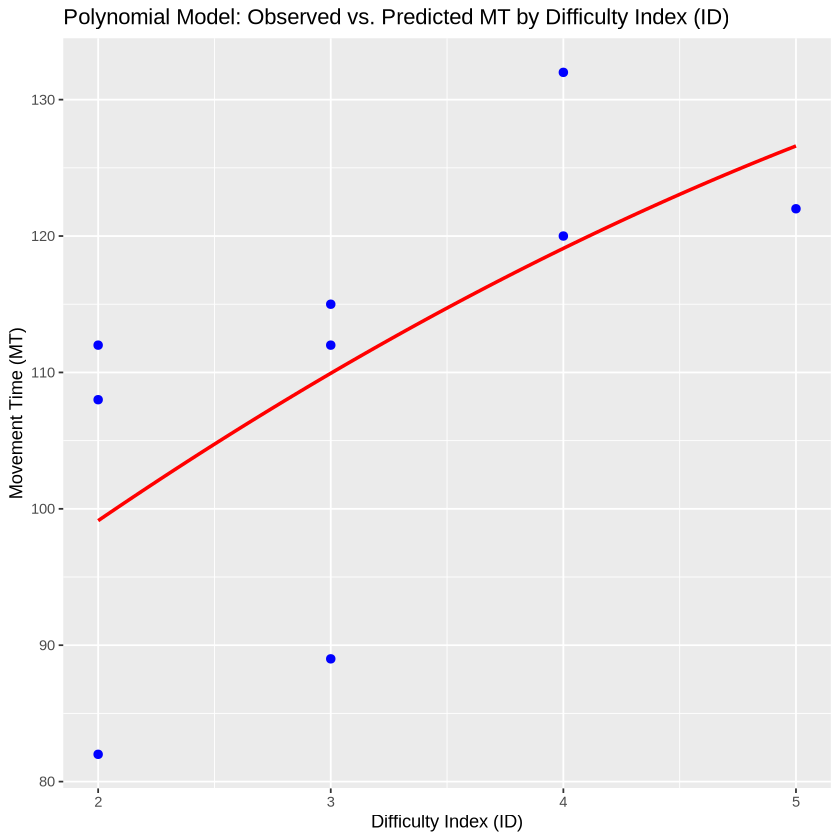

In [32]:
# Fitting a polynomial model (quadratic)
poly_model <- lm(MT ~ poly(ID, 2), data = mean_mt_data_2)

# Summary of the polynomial model
summary(poly_model)

# Visualizing the polynomial fit
library(ggplot2)

ggplot(mean_mt_data_2, aes(x = ID, y = MT)) +
  geom_point(color = "blue", size = 2) +  # Observed data points
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "red", se = FALSE) +  # Polynomial regression line
  labs(title = "Polynomial Model: Observed vs. Predicted MT by Difficulty Index (ID)",
       x = "Difficulty Index (ID)", y = "Movement Time (MT)")

#### Interpretation

- The model provides coefficients for both the linear and quadratic terms (poly(ID, 2)1 and poly(ID, 2)2). However, the p-values for these terms are quite high (0.0935 for the linear term and 0.8746 for the quadratic term), which suggests that neither term is statistically significant at conventional significance levels.
- The residual standard error is 14.11, which indicates the spread of the residuals around the fitted model. This is higher than desirable if you are aiming for a close fit.
- The multiple R² value of 0.3996 means that only about 40% of the variation in MT is explained by the polynomial model, which is quite low.
- With a p-value of 0.2164, the overall model is not statistically significant, indicating that the polynomial model does not significantly improve the fit.

#### Conclusion

Based on this output, it seems that the polynomial model does not provide a substantial improvement over the linear model. This could be due to the limited data points or inherent variability in the data.

### Data transformation & Normality and variance tests

Let's check if transforming the response variable (e.g., log(MT)) can stabilize variance and improve fit and ensure that residuals meet the assumptions of linear regression, namely normality and homogeneity of variances :

In [33]:
install.packages("car")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




Call:
lm(formula = log_MT ~ ID, data = mean_mt_data_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19427 -0.05402  0.03559  0.08679  0.12316 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.42021    0.14160   31.22 8.94e-09 ***
ID           0.08756    0.04336    2.02   0.0832 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1293 on 7 degrees of freedom
Multiple R-squared:  0.3682,	Adjusted R-squared:  0.2779 
F-statistic: 4.079 on 1 and 7 DF,  p-value: 0.08317


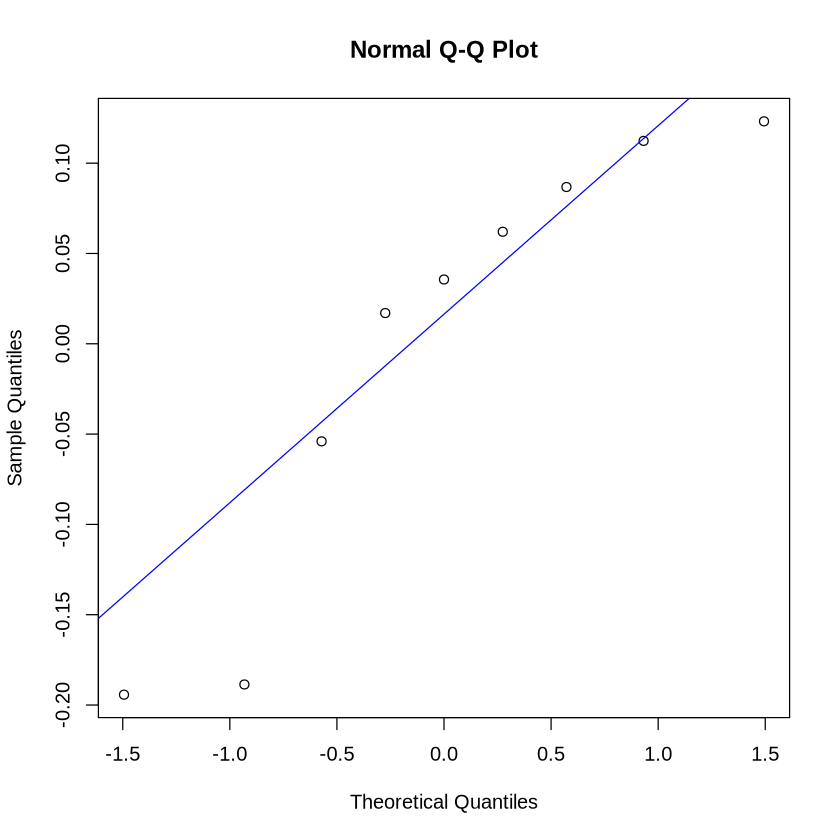


	Shapiro-Wilk normality test

data:  residuals(model_log)
W = 0.8572, p-value = 0.08939



	studentized Breusch-Pagan test

data:  model_log
BP = 1.7023, df = 1, p-value = 0.192


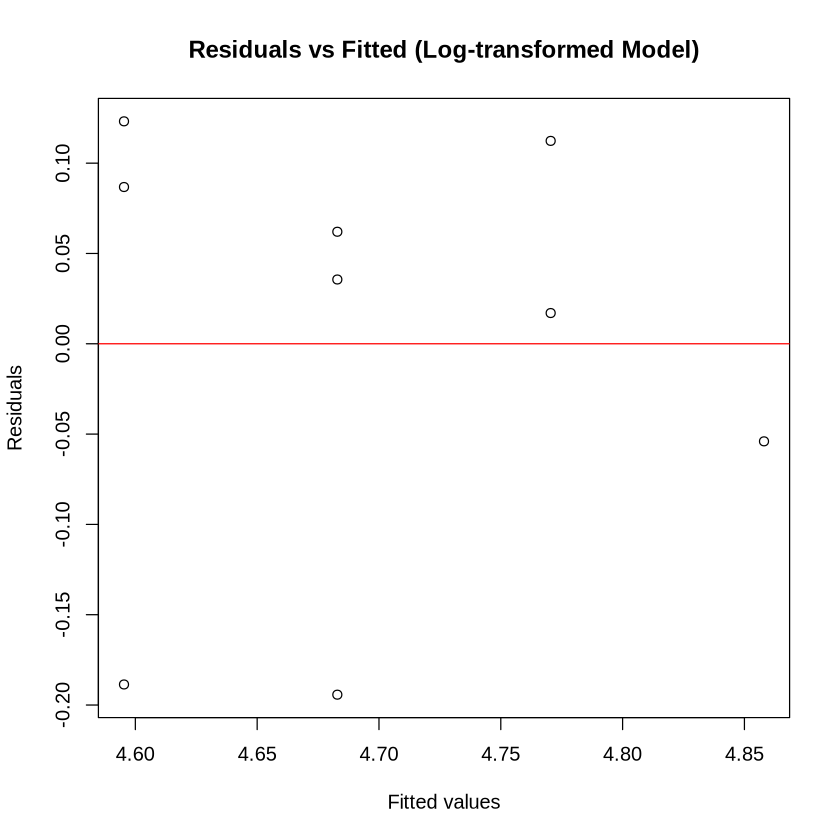

In [34]:
# Loading necessary packages
library(ggplot2)
library(car) # For residual diagnostics

# Transforming the MT data
mean_mt_data_2$log_MT <- log(mean_mt_data_2$MT)

# Fitting a linear model on the log-transformed MT
model_log <- lm(log_MT ~ ID, data = mean_mt_data_2)

# Summary of the model
summary(model_log)

# Plotting residuals to check normality
qqnorm(residuals(model_log))
qqline(residuals(model_log), col = "blue")

# Plotting residuals against fitted values to check homogeneity of variances
plot(fitted(model_log), residuals(model_log), 
     xlab = "Fitted values", ylab = "Residuals",
     main = "Residuals vs Fitted (Log-transformed Model)")
abline(h = 0, col = "red")


# Performing statistical tests for assumptions

# 1. Normality test of residuals (Shapiro-Wilk test)
shapiro.test(residuals(model_log))

library(lmtest)

# 2. Homogeneity of variances (Breusch-Pagan test)
bptest(model_log)

#### Interpretation 


###### a. Log-transformed regression model:

The model fit (Multiple R-squared) is 0.3682, which indicates that about 36.82% of the variance in log_MT is explained by ID. This is not a very good fit, but it may be acceptable depending on the purpose of the analysis.
The coefficient associated with ID has a p-value of 0.0832, which is close to the usual significance limit (0.05) but still slightly insignificant. This means that the influence of ID on log_MT may not be very strong.


######  b. Normality test (Shapiro-Wilk):

The Shapiro-Wilk test for the residuals shows a p-value of 0.08939, which is greater than 0.05. This indicates that there is insufficient evidence to reject the assumption of normality of residuals, so the normality assumption seems to be met.


###### c. Homogeneity of variances test (Breusch-Pagan):

The Breusch-Pagan test gives a p-value of 0.192, which is also greater than 0.05. This suggests that the assumption of homogeneity of variances is met, so there is no evidence of heteroscedasticity in the model.


#### Conclusion


The log-transformed model meets the assumptions of normality of residuals and homogeneity of variances. However, the coefficient for ID is not significant at the 0.05 level, which could indicate that the effect of ID on log_MT is not very pronounced.

## Improving interpretation and presentation of results

### Comparison tables and heatmaps

Let’s use heatmaps to visualize MT-ID trends based on A and W values :

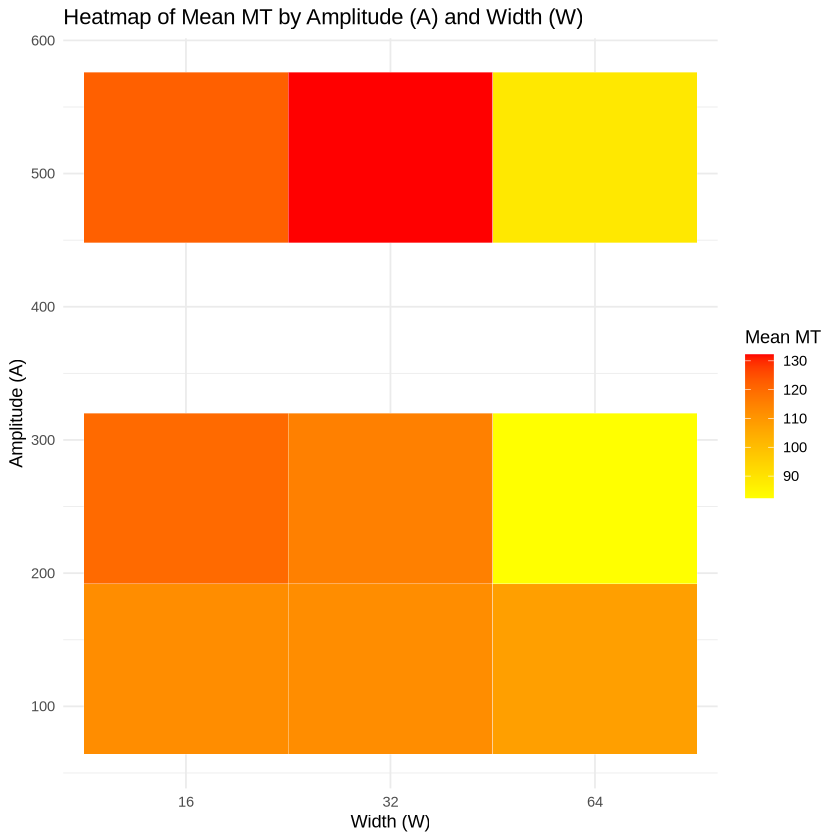

In [37]:
# Loading required libraries
library(reshape2)
library(ggplot2)

# Aggregating mean MT values for each combination of A and W
pivot_data <- dcast(raw_data_2, A ~ W, value.var = "MT", fun.aggregate = mean)

# Reshaping data for ggplot
pivot_data_melted <- melt(pivot_data, id.vars = "A", variable.name = "W", value.name = "Mean_MT")

# Heatmap visualization
ggplot(pivot_data_melted, aes(x = W, y = A, fill = Mean_MT)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "yellow", high = "red") +
  labs(title = "Heatmap of Mean MT by Amplitude (A) and Width (W)",
       x = "Width (W)", y = "Amplitude (A)", fill = "Mean MT") +
  theme_minimal()

The resulting heatmap nicely shows the variations of Mean MT (Average Movement Time) as a function of the amplitude (A) and width (W) of the targets. Looking at the colors, we can see that the red areas indicate a higher MT, suggesting that the combinations of A and W values in these areas are associated with longer movement times. This could mean that for targets with high A and W values, participants take longer to reach the target, probably due to increased difficulty. Conversely, the yellow areas show shorter movement times, indicating A and W combinations for which movements are faster.

### Calculating confidence intervals for predictions

This may strengthen the interpretation of the effect of task difficulty on MT and the accuracy of the obtained parameters.

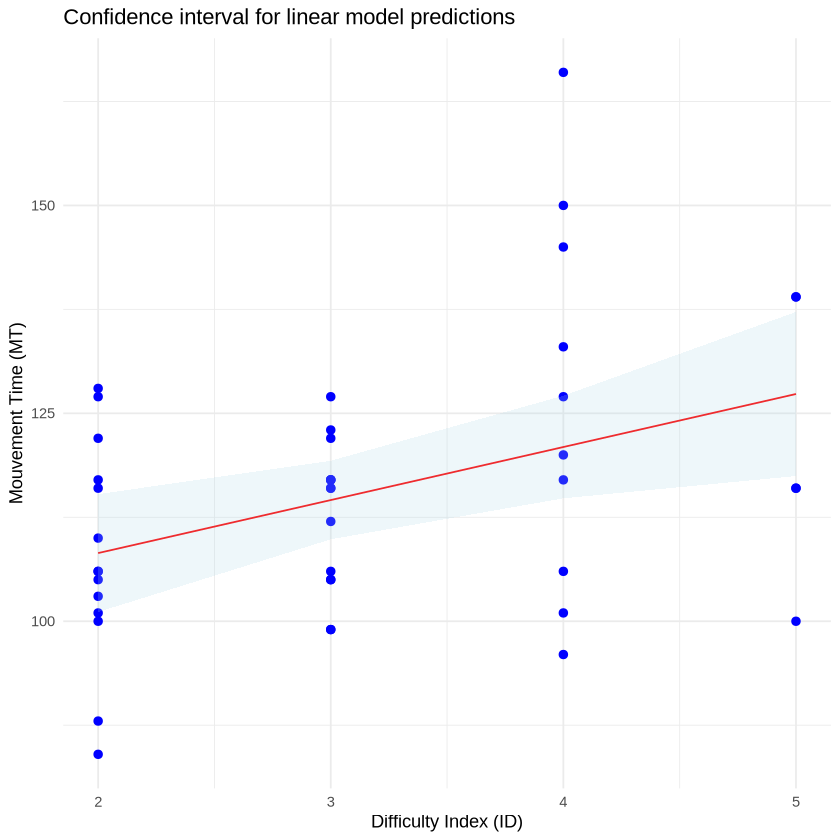

In [36]:
# Filtering data to exclude errors
filtered_data <- raw_data_2[raw_data_2$error == 0, ]

# Checking if MT and ID columns exist and do not contain missing values
if (!("MT" %in% names(filtered_data)) || !("ID" %in% names(filtered_data))) {
  stop("MT or ID columns are missing in the filtered data.")
}

# Deleting rows with NA values in MT and ID columns
filtered_data <- na.omit(filtered_data[, c("MT", "ID")])

# Checking if there is any data left after filtering
if (nrow(filtered_data) == 0) {
  stop("The filtered data is empty after removing errors and missing values.")
}

# Creating a linear model (MT ~ ID)
model_linear <- lm(MT ~ ID, data = filtered_data)

# Calculating predictions and confidence intervals
predictions <- predict(model_linear, newdata = filtered_data, interval = "confidence")

# Adding confidence intervals to filtered data for visualization
filtered_data$predicted_MT <- predictions[, "fit"]
filtered_data$conf_lower <- predictions[, "lwr"]
filtered_data$conf_upper <- predictions[, "upr"]

# Visualizeing confidence intervals
ggplot(filtered_data, aes(x = ID, y = MT)) +
  geom_point(color = "blue", size = 2) +
  geom_line(aes(y = predicted_MT), color = "red", linetype = "solid") +
  geom_ribbon(aes(ymin = conf_lower, ymax = conf_upper), alpha = 0.2, fill = "lightblue") +
  labs(title = "Confidence interval for linear model predictions",
       x = "Difficulty Index (ID)", y = "Mouvement Time (MT)") +
  theme_minimal()

The band around the red line represents the 95% confidence interval of the model's predictions. This interval indicates the uncertainty associated with the predictions: the wider the band, the more uncertainty there is around the predicted mean value. Here, we observe that the confidence interval widens at the extreme values of ID, which may indicate greater variability in the observations for higher difficulty levels.

The fact that the confidence interval widens at the extreme values of ID suggests that the model is less certain about its predictions for these difficulty levels. This may be due to a smaller number of observations or to greater variability in movement times at these levels.

and thus, this graph shows that the linear model predicts an increase in movement time with difficulty, but with some uncertainty, particularly at higher difficulty levels.